# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](https://repositorio.iscte-iul.pt/bitstream/10071/9499/5/dss_v3.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In the paper "A data-driven approach to predict the success of bank telemarketing", under the "Materials and Methods" section it alluded to multiple campaigns (each campaign consisting of multiple calls).  In the study "a Portuguese retail bank, from May 2008 to June 2013, in total of 52944 phone contacts. The dataset is unbalanced, as only 6557 (12.38%) records are related with successes".



 

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
# core
import numpy as np
import pandas as pd
import time

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
df = pd.read_csv('../data/bank-additional-full.csv', sep = ';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [9]:
df.query('duration == 0')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,0
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0


In [11]:
df.query('duration == 0')['y'].value_counts()

y
0    4
Name: count, dtype: int64

In [13]:
df.drop(columns='duration', inplace=True)

df.info()
display(df.describe())

bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']

df_bank = df[bank_features + ['y']].copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [15]:
display(df.info())

for col in ['job', 'marital', 'education', 'default', 'housing', 'loan']:
    most_common = df_bank[col].mode()[0]
    df_bank[col] = df_bank[col].replace('unknown', most_common)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

None

#### Business Objective

Our goal "is to compare the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines)" with the business objective to predict if a client will subscribe to a deposit during a call or not.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [17]:
# One-hot encode 
df_encoded = pd.get_dummies(df_bank, columns=['job', 'marital', 'education', 'default', 'housing', 'loan'], drop_first=True)

In [19]:
X = df_encoded.drop(columns='y')
y = df_encoded['y']

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [21]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [23]:
# Confirm split shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))
print("y_test distribution:\n", y_test.value_counts(normalize=True))

X_train shape: (32950, 22)
X_test shape: (8238, 22)
y_train distribution:
 y
0    0.887344
1    0.112656
Name: proportion, dtype: float64
y_test distribution:
 y
0    0.887351
1    0.112649
Name: proportion, dtype: float64


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [25]:
dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

In [27]:
# Accuracy
print("Baseline Accuracy:", accuracy_score(y_test, y_pred_dummy))

# Full report
print("\nClassification Report (Baseline):")
print(classification_report(y_test, y_pred_dummy, zero_division=0))

Baseline Accuracy: 0.8873512988589464

Classification Report (Baseline):
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7310
           1       0.00      0.00      0.00       928

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [29]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [31]:
y_pred_log = log_reg.predict(X_test)

In [33]:
# train time 
start_time = time.time()
log_reg.fit(X_train, y_train)
end_time = time.time()

log_reg_train_time = end_time - start_time
log_reg_train_acc = log_reg.score(X_train, y_train)
log_reg_test_acc = accuracy_score(y_test, y_pred_log)

results = []
results.append(['Logistic Regression', log_reg_train_time, log_reg_train_acc, log_reg_test_acc])

### Problem 9: Score the Model

What is the accuracy of your model?

In [35]:
# Accuracy
print("The accuracy of the Logistic Regression model is ", accuracy_score(y_test, y_pred_log))

The accuracy of the Logistic Regression model is  0.8873512988589464


In [37]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log, zero_division=0))

# Confusion matrix 
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))



Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7310
           1       0.00      0.00      0.00       928

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238


Confusion Matrix:
[[7310    0]
 [ 928    0]]


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [39]:
knn = KNeighborsClassifier()

# Measure training time
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()

# Calculate train time
knn_train_time = end_time - start_time
print(knn_train_time)

0.005612373352050781


In [41]:
# Predict
y_pred_knn = knn.predict(X_test)

# Accuracy
knn_train_acc = knn.score(X_train, y_train)
knn_test_acc = accuracy_score(y_test, y_pred_knn)

# Display
print(f"Train Accuracy: {knn_train_acc:.4f}")
print(f"Test Accuracy:  {knn_test_acc:.4f}")
print(f"Train Time:     {knn_train_time:.4f} seconds")


Train Accuracy: 0.8875
Test Accuracy:  0.8767
Train Time:     0.0056 seconds


In [43]:
# Add KNN to results
results.append(['KNN', knn_train_time, knn_train_acc, knn_test_acc])


In [45]:
dtree = DecisionTreeClassifier(random_state=42)

# measure training time
start_time = time.time()
dtree.fit(X_train, y_train)
end_time = time.time()

# training time
dtree_train_time = end_time - start_time


In [47]:
# predict
y_pred_dtree = dtree.predict(X_test)

# accuracy scores
dtree_train_acc = dtree.score(X_train, y_train)
dtree_test_acc = accuracy_score(y_test, y_pred_dtree)

print(f"Train Accuracy: {dtree_train_acc:.4f}")
print(f"Test Accuracy:  {dtree_test_acc:.4f}")
print(f"Train Time:     {dtree_train_time:.4f} seconds")


Train Accuracy: 0.9080
Test Accuracy:  0.8722
Train Time:     0.0510 seconds


In [49]:
results.append(['Decision Tree', dtree_train_time, dtree_train_acc, dtree_test_acc])

In [51]:
# SVM model 
svm = SVC(random_state=42)

# Time the training
start_time = time.time()
svm.fit(X_train, y_train)
end_time = time.time()

# Training time
svm_train_time = end_time - start_time


In [53]:
# Predict on test set
y_pred_svm = svm.predict(X_test)

# Accuracy
svm_train_acc = svm.score(X_train, y_train)
svm_test_acc = accuracy_score(y_test, y_pred_svm)

print(f"Train Accuracy: {svm_train_acc:.4f}")
print(f"Test Accuracy:  {svm_test_acc:.4f}")
print(f"Train Time:     {svm_train_time:.4f} seconds")


Train Accuracy: 0.8873
Test Accuracy:  0.8874
Train Time:     5.5633 seconds


In [55]:
results.append(['SVM', svm_train_time, svm_train_acc, svm_test_acc])

In [57]:
# Create DataFrame from results list
results_df = pd.DataFrame(results, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
results_df[['Train Time', 'Train Accuracy', 'Test Accuracy']] = results_df[['Train Time', 'Train Accuracy', 'Test Accuracy']].round(4)

# Display table
results_df


,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.1946,0.8873,0.8874
1,KNN,0.0056,0.8875,0.8767
2,Decision Tree,0.0510,0.9080,0.8722
3,SVM,5.5633,0.8873,0.8874


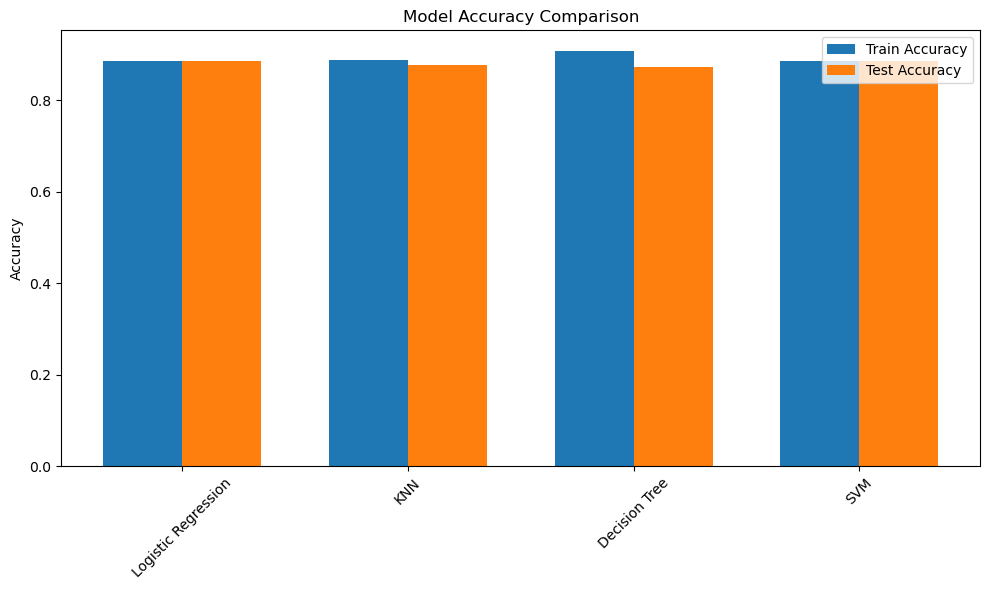

In [59]:
# plot 
plt.figure(figsize=(10, 6))

x = range(len(results_df))
bar_width = 0.35

plt.bar(x, results_df['Train Accuracy'], width=bar_width, label='Train Accuracy')
plt.bar([i + bar_width for i in x], results_df['Test Accuracy'], width=bar_width, label='Test Accuracy')

plt.xticks([i + bar_width / 2 for i in x], results_df['Model'], rotation=45)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.legend()
plt.tight_layout()
plt.show()


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [61]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10]
}


In [63]:
# Grid search 
grid_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_tree.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [65]:
# Best estimator
best_tree = grid_tree.best_estimator_
print("best parameters:", grid_tree.best_params_)

# Test accuracy
y_pred_best_tree = best_tree.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_best_tree)

print("Test Accuracy of Tuned Decision Tree:", round(test_acc, 4))


best parameters: {'max_depth': 5, 'min_samples_split': 2}
Test Accuracy of Tuned Decision Tree: 0.8872


In [67]:
results.append([
    'Tuned Decision Tree',
    0,  
    best_tree.score(X_train, y_train),
    test_acc
])


##### Questions

If the dataset wasn't so imbalanced toward unsuccessful marketing campaigns, how would that effect it?
Would applying class_weight='balanced' still be necessary?